Mariana Valenzuela Lafarga
29 de enero de 2024

# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

In [1]:
import sympy as sp
x= sp.var("x")
def f(x):
    return 1260+117*x-9*x**2
f(x)

-9*x**2 + 117*x + 1260

In [2]:
dx= sp.diff(f(x),x)
dx

117 - 18*x

In [3]:
pc= sp.solve(dx,x)[0]
pc

13/2

In [4]:
valor_optimo= f(x).subs(x,pc)
valor_optimo

6561/4

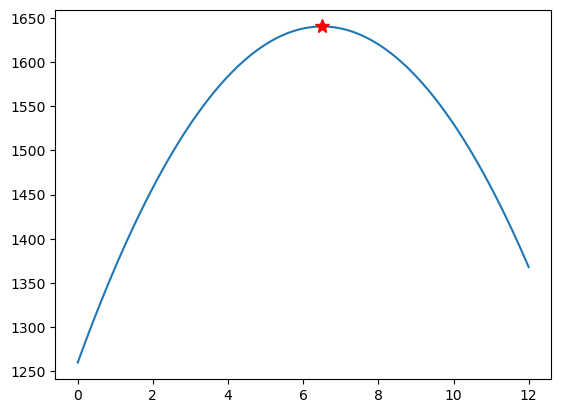

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
xn= np.linspace(0,12,100)
yn=f(xn)
plt.plot(xn,yn)
plt.plot(pc,valor_optimo, "*r", ms=10)

Se trata de un máximo global

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [6]:
x= sp.var("x")
def f(x):
    return 5+x+(4/x)
f(x)

x + 5 + 4/x

In [7]:
dx= sp.diff(f(x),x)
dx

1 - 4/x**2

In [8]:
pc= sp.solve(dx,x)
pc

[-2, 2]

In [9]:
valores_optimos=[]
for p in pc:
    par_ordenado=[p,f(p)]
    valores_optimos.append(par_ordenado)
valores_optimos

[[-2, 1], [2, 9]]

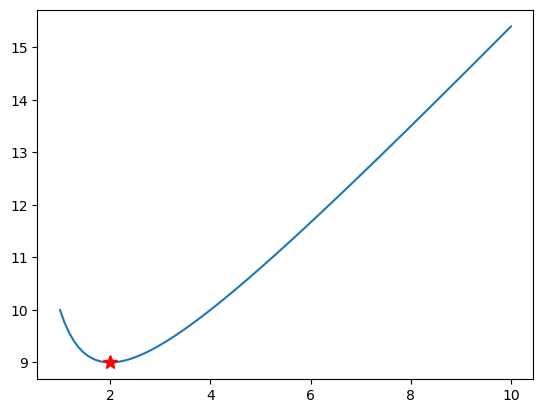

In [10]:
plt.figure()
xn= np.linspace(1,10,100)
yn=f(xn)
plt.plot(xn,yn)
for par in valores_optimos:
    if par[0] >0:
        plt.plot(par[0],par[1], "*r", ms=10)

Se trata de un mínimo global

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [11]:
x= sp.var("x")
def f(x):
    return 6-2*x+(18-2*x**2)**(1/2)
f(x)

-2*x + (18 - 2*x**2)**0.5 + 6

In [12]:
dx= sp.diff(f(x),x)
dx

-2.0*x/(18 - 2*x**2)**0.5 - 2

In [13]:
pc= sp.solve(dx,x)[0]
pc

-2.44948974278318

In [14]:
valor_optimo= f(x).subs(x,pc)
valor_optimo

13.3484692283495

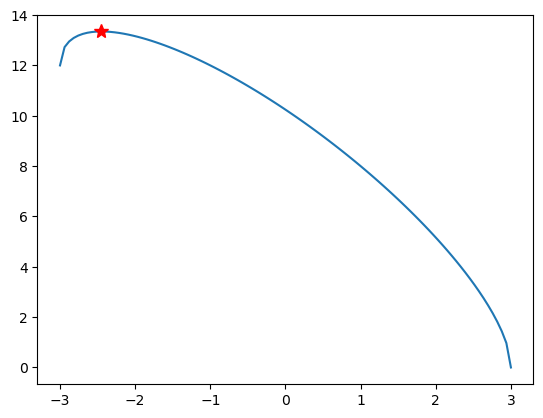

In [15]:
plt.figure()
xn= np.linspace(-3,3,100)
yn=f(xn)
plt.plot(xn,yn)
plt.plot(pc,valor_optimo, "*r", ms=10)

Se trata de un máximo global

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [16]:
x= sp.var("x")
def f(x):
    return x**4/4 + x**3/3 - x**2
f(x)

x**4/4 + x**3/3 - x**2

In [17]:
dx= sp.diff(f(x),x)
dx

x**3 + x**2 - 2*x

In [18]:
pc= sp.solve(dx,x)
pc

[-2, 0, 1]

In [19]:
valores_optimos=[]
for p in pc:
    par_ordenado=[p,f(p)]
    valores_optimos.append(par_ordenado)
valores_optimos

[[-2, -8/3], [0, 0], [1, -5/12]]

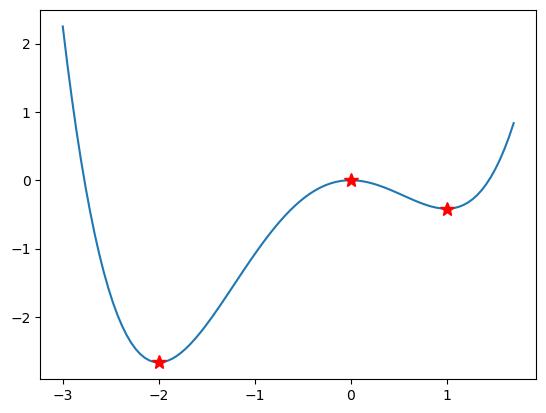

In [20]:
plt.figure()
xn= np.linspace(-3,1.7,100)
yn=f(xn)
plt.plot(xn,yn)
for par in valores_optimos:
        plt.plot(par[0],par[1], "*r", ms=10)

Se trata de un mínimo global al inicio, máximo local el segundo punto crítico y mínimo local el tercer punto crítico

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

Definir criterio de optimizacion: Maximixar volumen.

Revisar variables:
- $l$- lado
- $b$- base
- $h$- altura
- $V$- volumen

Definimos las formulas necesarias
$$ V= \frac{1}{3} \pi r^2 h$$
Fórmula del perimetro

$b+2l=10$

$r=b/2$

Fórmula 2

$l^2=r^2+h^2$

In [37]:
l= sp.var("l")
b= sp.var("b")
r= sp.var("r")
h= sp.var("h")
def V(x,y):
    return sp.pi/3*r**2*h
f(x)

pi*h*r**2/3

In [40]:
restriccion= b+2*l-10
radio= b/2
pitagoras= l**2-r**2-h**2

In [41]:
altura=sp.solve(pitagoras,h)[1]
altura

sqrt((l - r)*(l + r))

In [42]:
V(r,h)

pi*h*r**2/3

In [48]:
V_lb=V(r,h).subs(h,altura).subs(r,radio)
V_lb

pi*b**2*sqrt((-b/2 + l)*(b/2 + l))/12

In [49]:
l_sol= sp.solve(restriccion,l)[0]
l_sol

5 - b/2

In [51]:
V_b= V_lb.subs(l, l_sol)
V_b

pi*b**2*sqrt(25 - 5*b)/12

In [53]:
dV= sp.diff(V_b,b)
dV

-5*pi*b**2/(24*sqrt(25 - 5*b)) + pi*b*sqrt(25 - 5*b)/6

In [55]:
sp.solve(dV,b)

[0, 4]

La base del triangulo debe ser 4

In [56]:
l_sol.subs(b,4)

3

Altura de los lados 

In [57]:
radio.subs(b,4)

2

In [59]:
altura.subs(r,2).subs(l,3)

sqrt(5)

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [60]:
x= sp.var("x")
y= sp.var("y")

def A(x,y):
    return x*y

restriccion= x+2*y-6

In [62]:
x_y= sp.solve(restriccion,x)[0]
x_y

6 - 2*y

In [63]:
A_y= A(x,y).subs(x,x_y)
A_y

y*(6 - 2*y)

In [65]:
dA= sp.diff(A_y,y)
dA

6 - 4*y

In [67]:
sp.solve(dA,y)[0]

3/2

Los postes deben medir 1.5 cada uno

In [68]:
x_y.subs(y,1.5)

3.00000000000000

El travesaño debe medir 3 mts